In [3]:
import train
# from train import eval
from eval import evaluation
import gymnasium as gym
from gymnasium.envs.registration import register
from stable_baselines3 import A2C, PPO, DQN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

model_path = "model.zip"  # Change path name to load different models
env = gym.make('2048-eval')
# env = RecordVideo(env, video_folder="./videos", disable_logger=False)

### Load model with SB3
# Note: Model can be loaded with arbitrary algorithm class for evaluation
# (You don't necessarily need to use PPO for training)
model = PPO.load(model_path)

eval_num = 100
score, highest, rewards = evaluation(env, model, render_last=False, eval_num=eval_num)


print("Avg_score:  ", np.sum(score)/eval_num)
print("Avg_highest:", np.sum(highest)/eval_num)

print(f"Counts: (Total of {eval_num} rollouts)")
c = Counter(highest)
for item in (sorted(c.items(),key = lambda i: i[0])):
    print(f"{item[0]}: {item[1]}")

env.close()


Avg_score:   9113.24
Avg_highest: 646.4
Counts: (Total of 100 rollouts)
128: 3
256: 9
512: 55
1024: 33


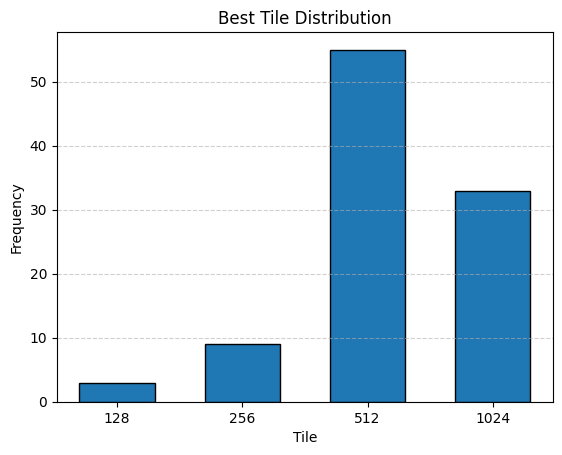

In [5]:
frequency_count = Counter(highest)
scores = sorted(frequency_count.keys())  # Sort the scores for proper alignment
frequencies = [frequency_count[score] for score in scores]

# Generate evenly spaced positions for the bars
positions = np.arange(len(scores))

# Create a bar chart with evenly spaced bars
plt.bar(positions, frequencies, width=0.6, edgecolor='black')  # Adjust 'width' as needed
plt.xlabel('Tile')
plt.ylabel('Frequency')
plt.title('Best Tile Distribution')

# Set custom x-axis labels and ensure they align with the bars
plt.xticks(positions, scores)
plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')  # Show grid lines only on the y-axis

plt.show()

(array([5.7698e+04, 8.5200e+02, 3.6300e+02, 6.0000e+00, 1.3100e+02,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+01, 3.0000e+00]),
 array([   0. ,  115.6,  231.2,  346.8,  462.4,  578. ,  693.6,  809.2,
         924.8, 1040.4, 1156. ]),
 <BarContainer object of 10 artists>)

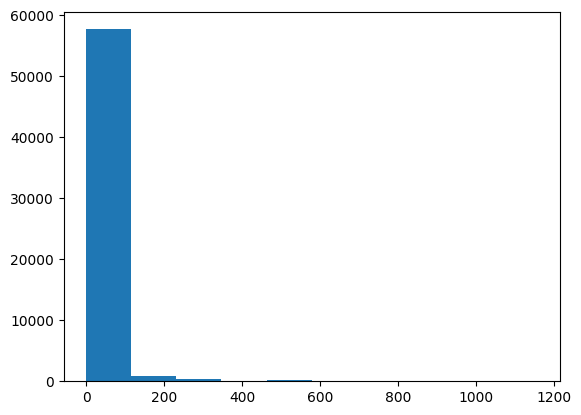

In [4]:
plt.hist(rewards)

(array([6.131e+03, 4.249e+03, 1.555e+03, 0.000e+00, 1.751e+03, 9.660e+02,
        0.000e+00, 4.840e+02, 1.510e+02, 5.710e+02, 0.000e+00, 4.100e+02,
        3.070e+02, 0.000e+00, 1.060e+02, 6.200e+01, 2.900e+01, 0.000e+00,
        1.600e+01, 5.000e+00, 0.000e+00, 2.050e+02, 1.300e+02, 1.230e+02,
        0.000e+00, 5.400e+01, 5.300e+01, 0.000e+00, 2.000e+01, 8.000e+00,
        4.000e+00, 0.000e+00, 1.400e+01, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.900e+01, 0.000e+00, 4.700e+01, 4.700e+01, 1.300e+01,
        0.000e+00, 1.800e+01, 1.000e+01, 0.000e+00, 4.000e+00, 1.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

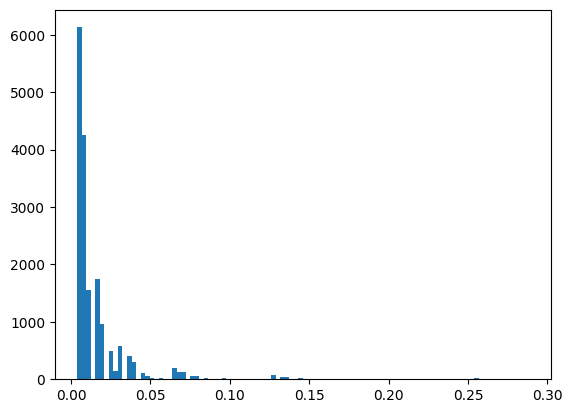

In [14]:
# reward = 0 if reward == 0 else np.log2(reward) / 10
rewards = [_ for _ in rewards if _ != 0]
plt.hist(rewards, bins=100)